In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/storage/data/oxford-iiit-pet/images'),Path('/storage/data/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/'images')
len(files)

7390

In [5]:
files[7]

Path('/storage/data/oxford-iiit-pet/images/keeshond_194.jpg')

In [6]:
def is_cat(x):
    return x[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(
    path, fnames=files, label_func=is_cat,
    seed=42, item_tfms=Resize(224))

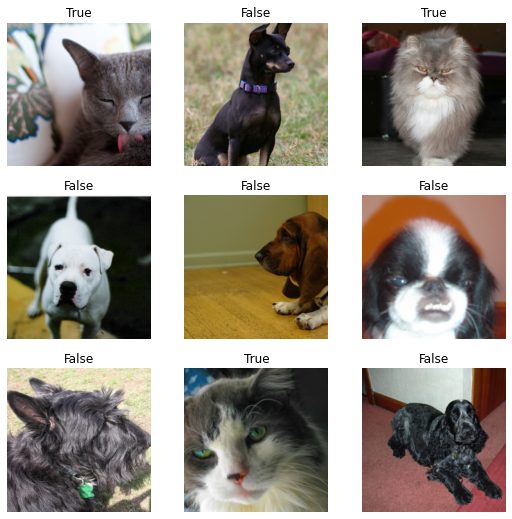

In [8]:
dls.show_batch()

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [10]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.136455,0.027922,0.008796,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.048749,0.026681,0.008796,00:28


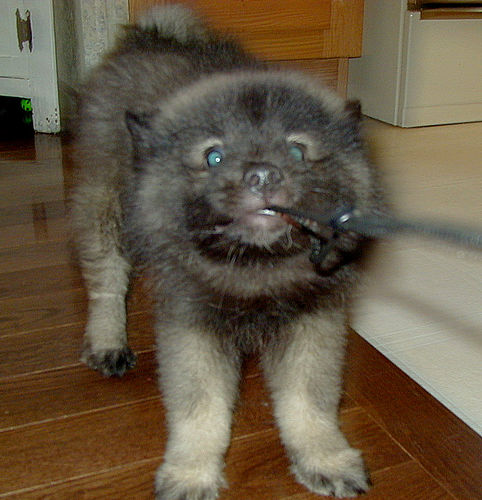

In [11]:
img = PILImage.create(files[7])
img

In [12]:
learn.predict(files[7])

('True', tensor(1), tensor([0.1313, 0.8687]))

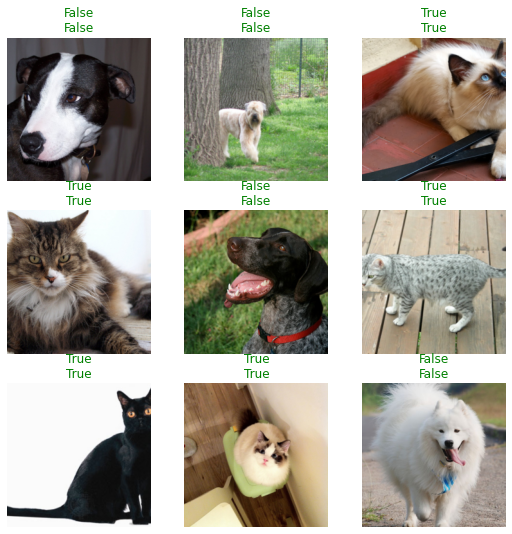

In [13]:
learn.show_results()